In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 데이터 불러오기 및 통합 === 
weather2017 = pd.read_csv('data/weather/weather2017.csv', encoding='cp949')
weather2018 = pd.read_csv('data/weather/weather2018.csv', encoding='cp949')
weather2019 = pd.read_csv('data/weather/weather2019.csv', encoding='cp949')
weather2020 = pd.read_csv('data/weather/weather2020.csv', encoding='cp949')
weather2021 = pd.read_csv('data/weather/weather2021.csv', encoding='cp949')
weather2022 = pd.read_csv('data/weather/weather2022.csv', encoding='cp949')

weather = pd.concat([weather2017, weather2018, weather2019, weather2020, weather2021, weather2022])
#print(weather.shape) ==> (52563, 38)
nsv = pd.read_csv('data/nsv/jeonnam.csv', encoding='cp949')
# print(nsv.shape) ==> (191003, 17)

# === 날씨 데이터 전처리 ===

# 1. NaN 개수 확인하기
# print(weather.isnull().sum()) # ==> 지울 것들 : 기온 QC플래그, 강수량 (mm), 강수량 QC플래그, 풍속 QC플래그, 풍향 QC플래그, 습도 QC플래그, 현지기압 QC플래그, 해면기압 QC플래그, 일조 (hr), 일조 QC플래그, 일사(MJ/m2), 일사 QC플래그, 적설 (cm), 3시간신적설 (cm), 운형(운형약어), 최저운고 (100m ), 지면상태(지면상태코드), 현상번호(국내식), 지면온도 QC플래그
weather = weather.drop(['기온 QC플래그','강수량(mm)','전운량(10분위)','중하층운량(10분위)','강수량 QC플래그','풍속 QC플래그','풍향 QC플래그','습도 QC플래그','현지기압 QC플래그','해면기압 QC플래그','일조(hr)','일조 QC플래그','일사(MJ/m2)','일사 QC플래그','적설(cm)','3시간신적설(cm)','운형(운형약어)','최저운고(100m )','지면상태(지면상태코드)','현상번호(국내식)','지면온도 QC플래그'], axis=1)
#print(nsv.isnull().sum())
#print(weather.isnull().sum())

# 2. 결측값 채우기(NaN => 이전값 대치)
weather = weather.fillna(method='ffill')
#print(weather.isnull().sum())

# 3. 불필요한 변수 제거
weather = weather.drop(['지점','지점명'],axis=1)
nsv = nsv.drop(['id','device_id','data_type','CDMA_tel','InteTemp','ElecTemp','ip_addr','DoseRate_uR','DoseRate_low','DoseRate_high','InteTemp_high','ElecTemp_high','state','DoseRate_warn','DoseRate_alert'],axis=1)

# 4. 날짜 포맷 맞추기
weather['time'] = pd.to_datetime(weather['일시'])
nsv['time'] = pd.to_datetime(nsv['rcv_time'])
weather = weather.drop(['일시'], axis=1)
nsv = nsv.drop(['rcv_time'], axis=1)
# 5. 데이터 통합
df = pd.merge(weather, nsv, on='time', how='inner')

# 6. 기타
df = df.rename(columns={'DoseRate_nSv': 'nsv'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44334 entries, 0 to 44333
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   기온(°C)         44334 non-null  float64       
 1   풍속(m/s)        44334 non-null  float64       
 2   풍향(16방위)       44334 non-null  float64       
 3   습도(%)          44334 non-null  float64       
 4   증기압(hPa)       44334 non-null  float64       
 5   이슬점온도(°C)      44334 non-null  float64       
 6   현지기압(hPa)      44334 non-null  float64       
 7   해면기압(hPa)      44334 non-null  float64       
 8   시정(10m)        44334 non-null  float64       
 9   지면온도(°C)       44334 non-null  float64       
 10  5cm 지중온도(°C)   44334 non-null  float64       
 11  10cm 지중온도(°C)  44334 non-null  float64       
 12  20cm 지중온도(°C)  44334 non-null  float64       
 13  30cm 지중온도(°C)  44334 non-null  float64       
 14  time           44334 non-null  datetime64[ns]
 15  nsv            4433

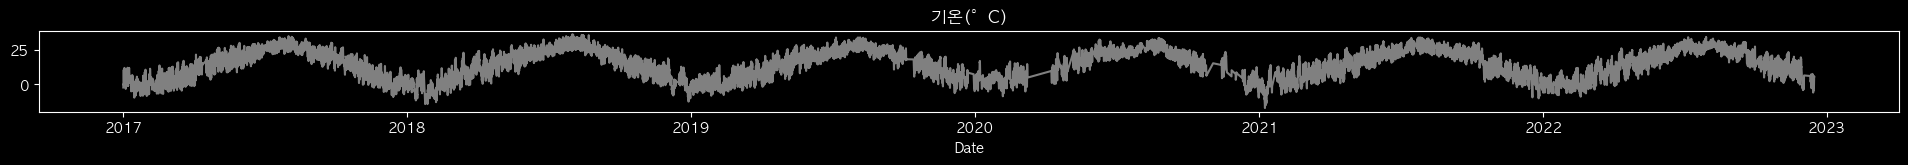

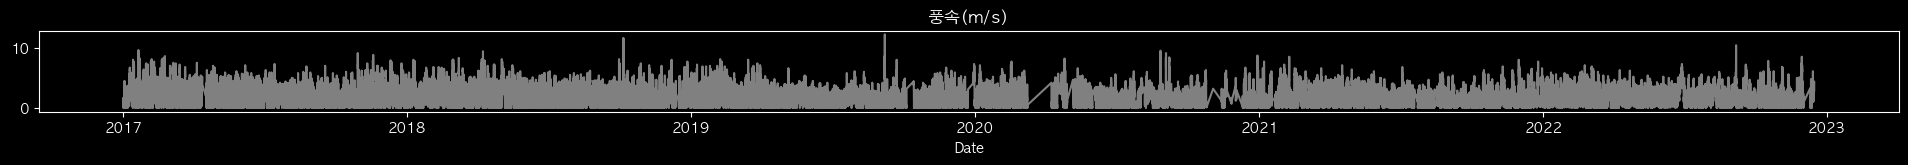

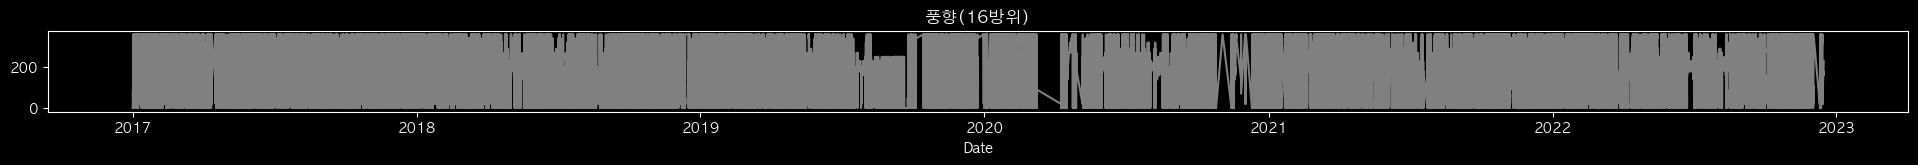

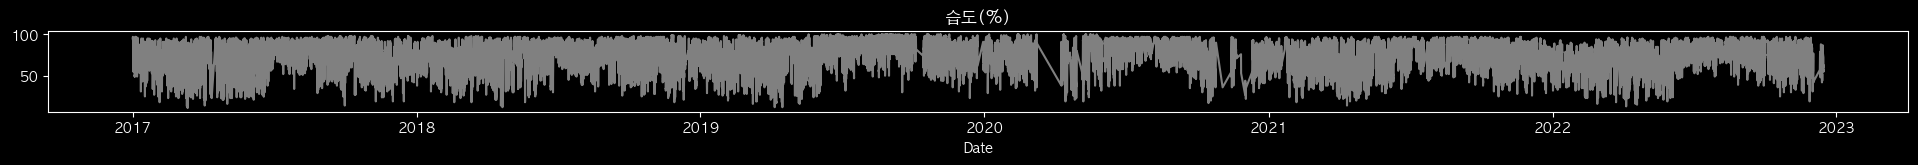

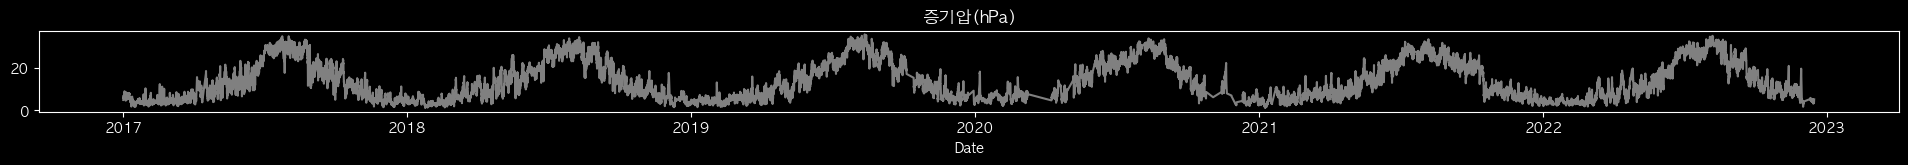

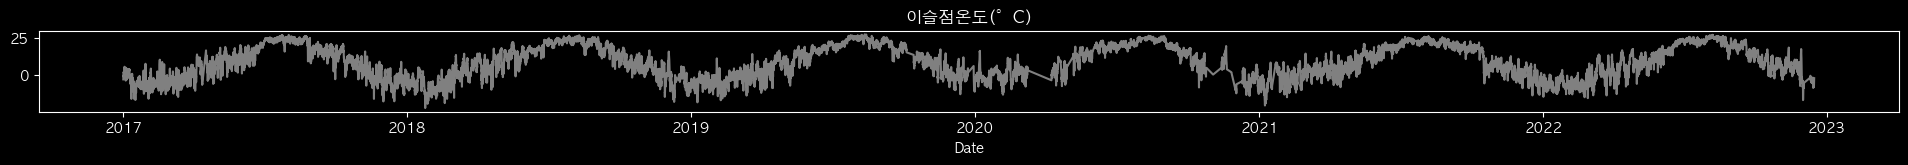

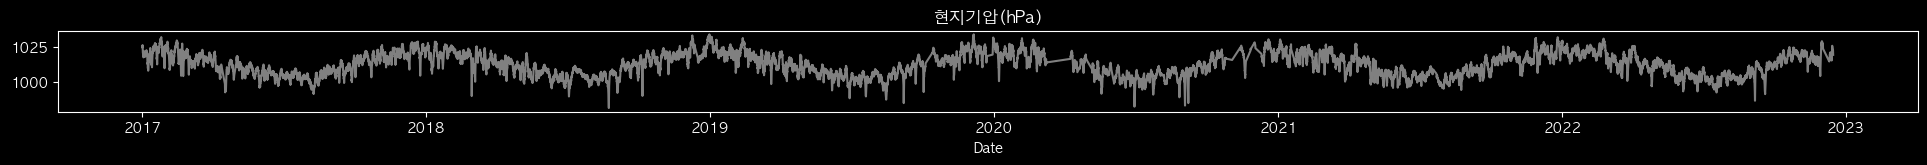

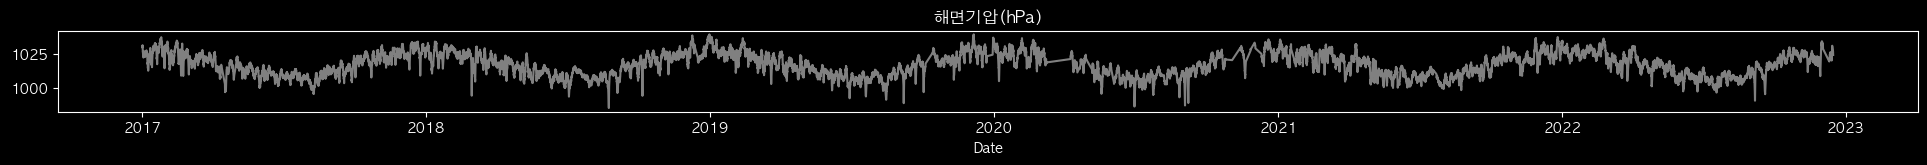

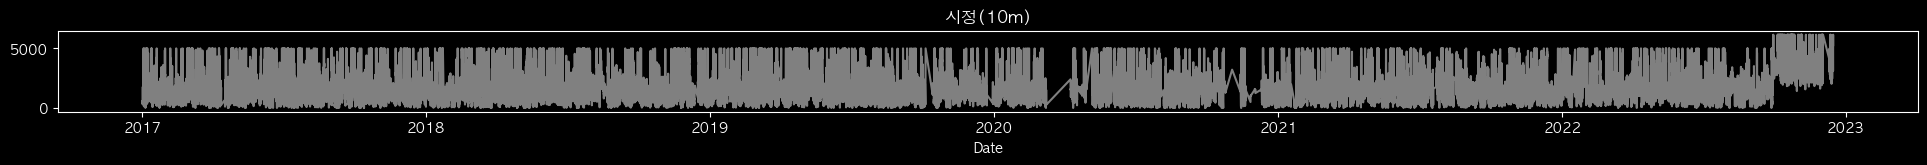

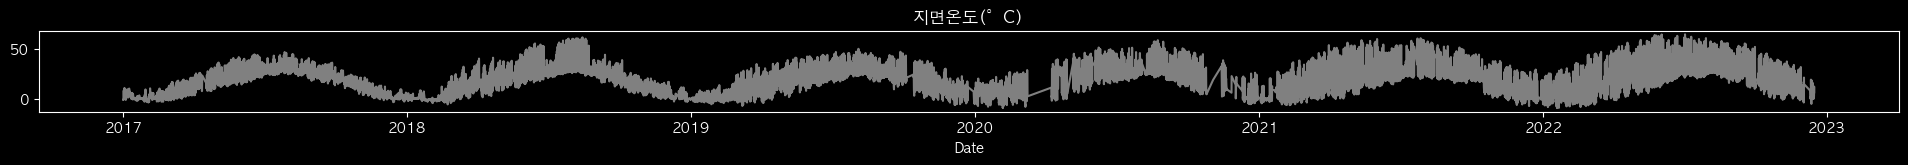

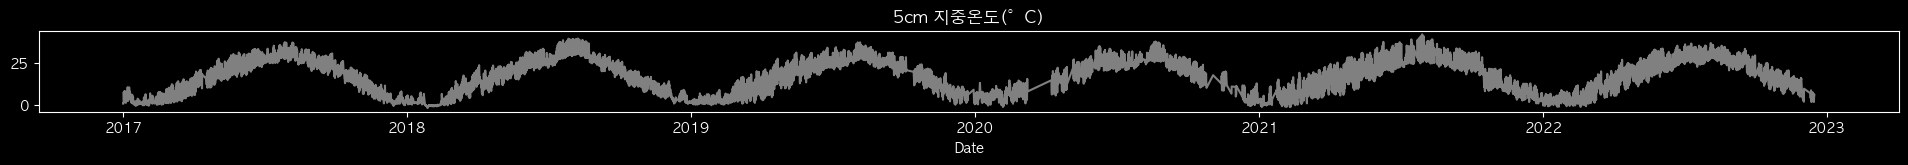

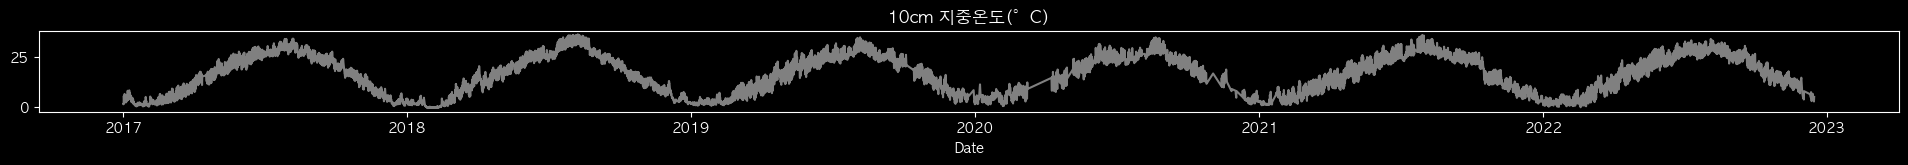

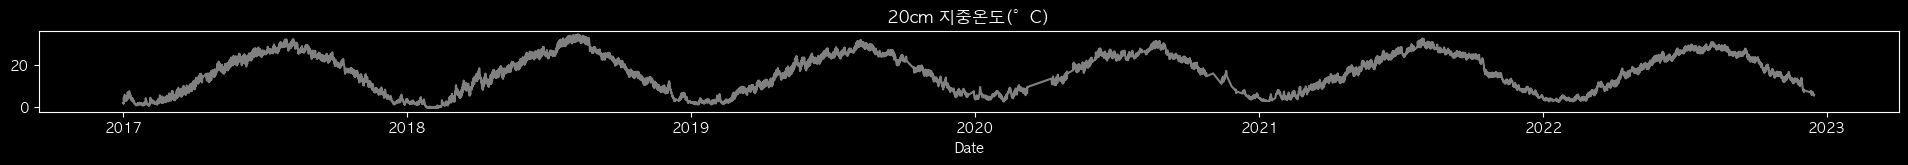

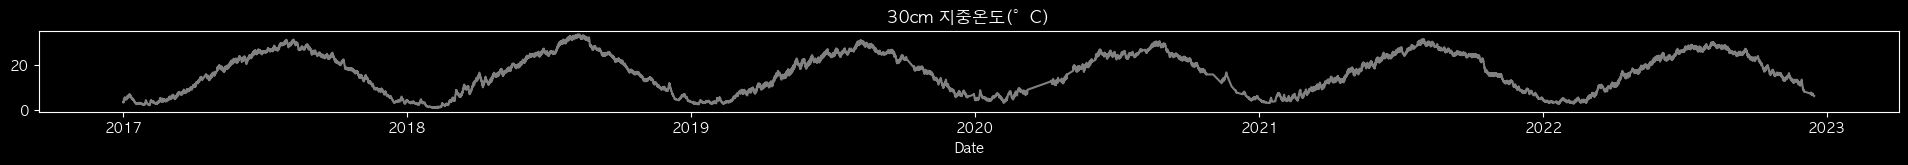

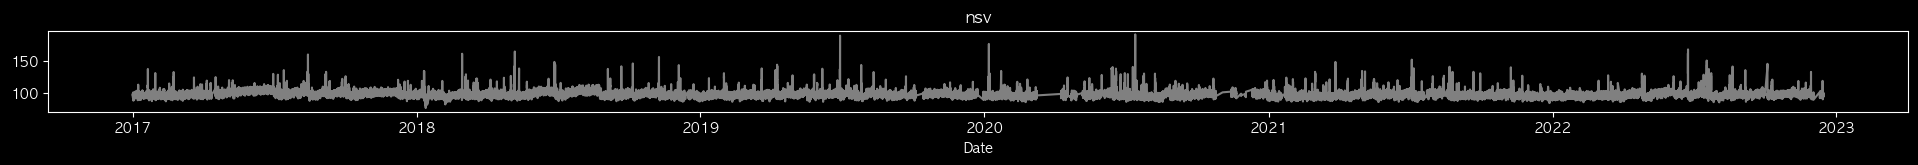

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
%matplotlib inline
plt.style.use(['dark_background'])

os = platform.system()

# Windows
if os == 'Windows':
    plt.rc('font', family= 'Malgun Gothic')

# Mac
elif os == 'Darwin':
    plt.rc('font', family= 'AppleGothic')

# Linux
elif os == 'Linux':
    plt.rc('font', family= 'NanumGothic')

else:
    print(f'{os} is not set')

# 열 이름 순서를 정의
order = ['time', '기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
         '현지기압(hPa)', '해면기압(hPa)', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
         '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'nsv']

# 열 순서를 변경
df = df[order]

# for문 활용 모든 열 시계열 데이터 시각화
num_columns = len(df.columns)
for v, i in enumerate(df.columns[1:]):
    plt.figure(figsize=(24, 20))
    plt.subplot(num_columns, 1, v + 1)
    plt.xlabel('Date')
    plt.plot(df['time'], df[i], linestyle='-', color='grey')
    plt.title(i)

plt.show()


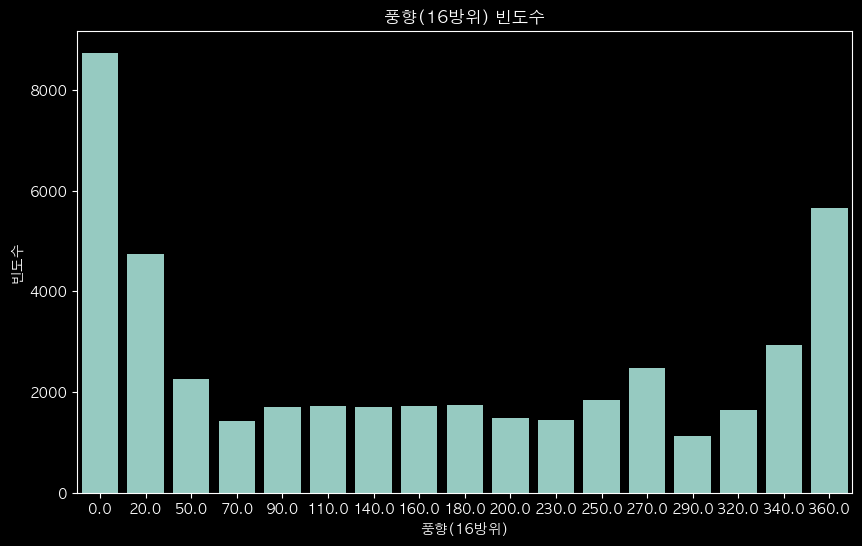

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 풍향(16방위) 열에서 각 값의 빈도수를 계산
wind_direction_counts = df['풍향(16방위)'].value_counts().reset_index()
wind_direction_counts.columns = ['풍향(16방위)', '빈도수']

# 빈도수를 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='풍향(16방위)', y='빈도수', data=wind_direction_counts)
plt.xlabel('풍향(16방위)')
plt.ylabel('빈도수')
plt.title('풍향(16방위) 빈도수')

plt.show()


In [6]:
# 'time' 변수를 제외한 다른 변수들과 'nsv' 변수 간의 상관관계 계산
correlation_matrix = df.drop('time', axis=1).corrwith(df['nsv'])

# 상관관계를 내림차순으로 정렬
sorted_correlation = correlation_matrix.sort_values(ascending=False)

# 결과 출력
print(sorted_correlation)

nsv              1.000000
이슬점온도(°C)        0.185765
30cm 지중온도(°C)    0.183022
20cm 지중온도(°C)    0.178831
10cm 지중온도(°C)    0.176343
5cm 지중온도(°C)     0.168116
기온(°C)           0.167597
증기압(hPa)         0.151323
지면온도(°C)         0.120996
습도(%)            0.097614
풍속(m/s)          0.028112
풍향(16방위)        -0.025663
시정(10m)         -0.101533
해면기압(hPa)       -0.248053
현지기압(hPa)       -0.248648
dtype: float64


/Users/foxyhyun/opt/anaconda3/envs/rmtec/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/foxyhyun/opt/anaconda3/envs/rmtec/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


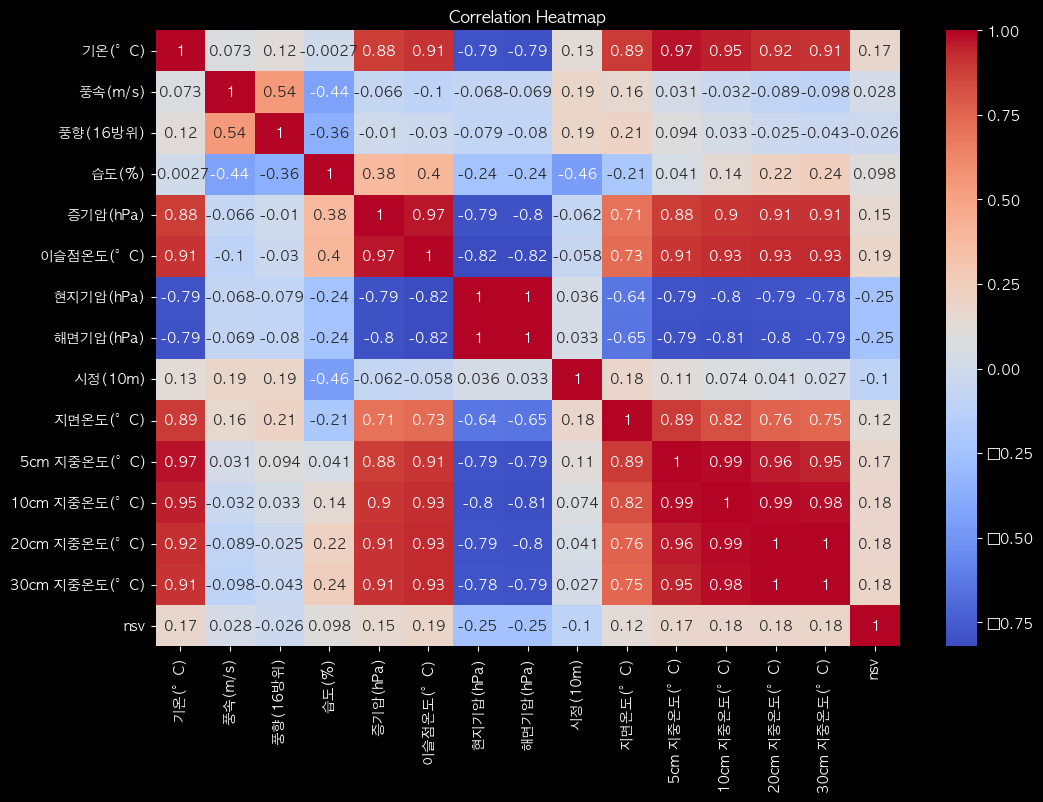

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 히트맵
correlation_matrix = df.drop('time', axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'time' 변수를 제외한 독립 변수들로 이루어진 데이터프레임
independent_variables = df.drop(['time', 'nsv'], axis=1)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_variables.columns
vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

# 결과 출력
print(vif_data)


         Variable           VIF
0          기온(°C)  5.950920e+02
1         풍속(m/s)  4.001204e+00
2        풍향(16방위)  3.738734e+00
3           습도(%)  5.533356e+02
4        증기압(hPa)  5.722122e+01
5       이슬점온도(°C)  3.659043e+02
6       현지기압(hPa)  6.503333e+08
7       해면기압(hPa)  6.500413e+08
8         시정(10m)  4.199791e+00
9        지면온도(°C)  3.579766e+01
10   5cm 지중온도(°C)  1.287572e+03
11  10cm 지중온도(°C)  2.065103e+03
12  20cm 지중온도(°C)  2.253610e+03
13  30cm 지중온도(°C)  1.196177e+03


In [14]:
#상관 관계: 다중공선성은 변수 간의 강한 상관 관계를 나타냅니다. 예를 들어, '현지기압(hPa)'와 '해면기압(hPa)' 변수는 서로 강한 상관 관계가 있을 수 있으며, 이로 인해 VIF 값이 높게 측정됩니다.

In [15]:
df.columns

Index(['time', '기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '시정(10m)', '지면온도(°C)',
       '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)',
       'nsv'],
      dtype='object')

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'time' 변수를 제외한 독립 변수들로 이루어진 데이터프레임
independent_variables = df.drop(['time', 'nsv','습도(%)', '해면기압(hPa)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'], axis=1)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_variables.columns
vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

# 결과 출력
print(vif_data)

    Variable        VIF
0     기온(°C)  59.961250
1    풍속(m/s)   3.809602
2   풍향(16방위)   3.562407
3   증기압(hPa)  51.855705
4  이슬점온도(°C)  43.251008
5  현지기압(hPa)  13.884815
6    시정(10m)   3.841539
7   지면온도(°C)  16.509170


In [30]:
import pandas as pd

# 주어진 데이터 프레임
data = df[['기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)',
           '이슬점온도(°C)', '현지기압(hPa)', '시정(10m)', '지면온도(°C)', 'nsv']]

# Maximum, Minimum, Average, Median 계산
maximum = data.max()
minimum = data.min()
average = data.mean()
median = data.median()

# 결과를 DataFrame에 저장
result_df = pd.DataFrame({'Maximum': maximum, 'Minimum': minimum, 'Average': average, 'Median': median})

# 결과 출력
print(result_df)


            Maximum   Minimum      Average     Median
기온(°C)       36.500  -17.3000    14.059467    15.0000
풍속(m/s)      12.200    0.0000     1.894578     1.5000
풍향(16방위)    360.000    0.0000   160.578788   140.0000
습도(%)       100.000   11.0000    73.282122    76.0000
증기압(hPa)     35.900    1.1000    13.917287    11.4000
이슬점온도(°C)    27.100  -22.0000     8.807324     8.9000
현지기압(hPa)  1034.300  980.8000  1012.024288  1012.2000
시정(10m)    6186.000    4.0000  1709.793206  1534.0000
지면온도(°C)     64.900   -9.6000    17.383638    17.3000
nsv         190.319   77.4313    98.502406    97.8838


In [31]:
from sklearn.ensemble import RandomForestRegressor

# 종속 변수와 독립 변수 설정
X = df.drop(['nsv', 'time'],'', axis=1)  # 'nsv' 및 'time' 열 제외
y = df['nsv']

# Random Forest 모델 생성
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)

# 변수 중요도 추출
importances = rf.feature_importances_

# 변수 중요도와 변수 이름을 묶어 DataFrame 생성
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# 변수 중요도를 내림차순으로 정렬
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 결과 출력
print(feature_importances)


          Feature  Importance
8         시정(10m)    0.132768
13  30cm 지중온도(°C)    0.093626
1         풍속(m/s)    0.085643
6       현지기압(hPa)    0.076806
5       이슬점온도(°C)    0.076628
9        지면온도(°C)    0.073133
7       해면기압(hPa)    0.072098
3           습도(%)    0.065970
0          기온(°C)    0.060988
12  20cm 지중온도(°C)    0.056414
10   5cm 지중온도(°C)    0.052926
4        증기압(hPa)    0.051673
2        풍향(16방위)    0.051222
11  10cm 지중온도(°C)    0.050107


In [3]:
# 모델의 예측 결과 (y_pred)와 실제 값 (y_test) 비교
for i in range(len(y_pred)):
    print(f"실제값: {y_test.iloc[i]:.2f}, 예측값: {y_pred[i][0]:.2f}")


실제값: 0.22, 예측값: 0.22
실제값: 0.12, 예측값: 0.12
실제값: 0.18, 예측값: 0.18
실제값: 0.18, 예측값: 0.18
실제값: 0.19, 예측값: 0.19
실제값: 0.22, 예측값: 0.22
실제값: 0.22, 예측값: 0.22
실제값: 0.17, 예측값: 0.17
실제값: 0.17, 예측값: 0.17
실제값: 0.21, 예측값: 0.21
실제값: 0.25, 예측값: 0.25
실제값: 0.16, 예측값: 0.16
실제값: 0.17, 예측값: 0.17
실제값: 0.17, 예측값: 0.17
실제값: 0.20, 예측값: 0.20
실제값: 0.23, 예측값: 0.23
실제값: 0.18, 예측값: 0.18
실제값: 0.19, 예측값: 0.19
실제값: 0.21, 예측값: 0.21
실제값: 0.18, 예측값: 0.18
실제값: 0.19, 예측값: 0.20
실제값: 0.21, 예측값: 0.21
실제값: 0.14, 예측값: 0.14
실제값: 0.17, 예측값: 0.17
실제값: 0.14, 예측값: 0.14
실제값: 0.16, 예측값: 0.16
실제값: 0.18, 예측값: 0.18
실제값: 0.16, 예측값: 0.16
실제값: 0.24, 예측값: 0.24
실제값: 0.11, 예측값: 0.11
실제값: 0.20, 예측값: 0.20
실제값: 0.16, 예측값: 0.16
실제값: 0.18, 예측값: 0.18
실제값: 0.20, 예측값: 0.20
실제값: 0.25, 예측값: 0.25
실제값: 0.13, 예측값: 0.13
실제값: 0.40, 예측값: 0.40
실제값: 0.20, 예측값: 0.20
실제값: 0.15, 예측값: 0.15
실제값: 0.12, 예측값: 0.12
실제값: 0.22, 예측값: 0.22
실제값: 0.17, 예측값: 0.17
실제값: 0.21, 예측값: 0.21
실제값: 0.15, 예측값: 0.15
실제값: 0.16, 예측값: 0.16
실제값: 0.21, 예측값: 0.21
실제값: 0.20, 예측값: 0.20
실제값: 0.20, 예측

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


# === 데이터 불러오기 및 통합 === 
weather2017 = pd.read_csv('data/weather/weather2017.csv', encoding='cp949')
weather2018 = pd.read_csv('data/weather/weather2018.csv', encoding='cp949')
weather2019 = pd.read_csv('data/weather/weather2019.csv', encoding='cp949')
weather2020 = pd.read_csv('data/weather/weather2020.csv', encoding='cp949')
weather2021 = pd.read_csv('data/weather/weather2021.csv', encoding='cp949')
weather2022 = pd.read_csv('data/weather/weather2022.csv', encoding='cp949')


#print(weather.shape) ==> (52563, 38)
nsv = pd.read_csv('data/nsv/jeonnam.csv', encoding='cp949')
# print(nsv.shape) ==> (191003, 17)

# === 날씨 데이터 전처리 ===
weather = pd.concat([weather2017, weather2018, weather2019, weather2020, weather2021, weather2022])
# 1. NaN 개수 확인하기
# print(weather.isnull().sum()) # ==> 지울 것들 : 기온 QC플래그, 강수량 (mm), 강수량 QC플래그, 풍속 QC플래그, 풍향 QC플래그, 습도 QC플래그, 현지기압 QC플래그, 해면기압 QC플래그, 일조 (hr), 일조 QC플래그, 일사(MJ/m2), 일사 QC플래그, 적설 (cm), 3시간신적설 (cm), 운형(운형약어), 최저운고 (100m ), 지면상태(지면상태코드), 현상번호(국내식), 지면온도 QC플래그
weather = weather.drop(['기온 QC플래그','강수량(mm)','전운량(10분위)','중하층운량(10분위)','강수량 QC플래그','풍속 QC플래그','풍향 QC플래그','습도 QC플래그','현지기압 QC플래그','해면기압 QC플래그','일조(hr)','일조 QC플래그','일사(MJ/m2)','일사 QC플래그','적설(cm)','3시간신적설(cm)','운형(운형약어)','최저운고(100m )','지면상태(지면상태코드)','현상번호(국내식)','지면온도 QC플래그'], axis=1)
#print(nsv.isnull().sum())
#print(weather.isnull().sum())

# 2. 결측값 채우기(NaN => 이전값 대치)
weather = weather.fillna(method='ffill')
#print(weather.isnull().sum())

# 3. 불필요한 변수 제거
weather = weather.drop(['지점','지점명'],axis=1)
nsv = nsv.drop(['id','device_id','data_type','CDMA_tel','InteTemp','ElecTemp','ip_addr','DoseRate_uR','DoseRate_low','DoseRate_high','InteTemp_high','ElecTemp_high','state','DoseRate_warn','DoseRate_alert'],axis=1)

# 4. 날짜 포맷 맞추기
weather['time'] = pd.to_datetime(weather['일시'])
nsv['time'] = pd.to_datetime(nsv['rcv_time'])
weather = weather.drop(['일시'], axis=1)
nsv = nsv.drop(['rcv_time'], axis=1)
# 5. 데이터 통합
df = pd.merge(weather, nsv, on='time', how='inner')

# 6. 기타
df = df.rename(columns={'DoseRate_nSv': 'nsv'})
order = ['time','기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)','nsv']
df = df[order]

# df.to_csv('data//mergeData.csv')

# === 상관계수 파악 ===
# 다중공선성 문제를 일으키는 변수 제거
# 꼭 필요한 변수는 성능이 안좋더라도 사용하기로 결정
df = df.drop(['해면기압(hPa)','5cm 지중온도(°C)','10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'],axis=1)

# === Random Forest로 중요도 확인 후 상위 5개만 사용 ===
df = df.drop(['증기압(hPa)','풍향(16방위)','이슬점온도(°C)','습도(%)'], axis=1)

# === MinMax === 

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 스케일링을 적용할 데이터를 선택
data_to_scale = df[['기온(°C)', '풍속(m/s)', '현지기압(hPa)', '시정(10m)', '지면온도(°C)', 'nsv']]

# MinMax 변환
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

# 'time' 변수와 스케일링된 데이터를 합침
df = pd.concat([df['time'], scaled_df], axis=1)

train_years = [2017, 2018, 2019, 2020]
val_year = 2021
df['year'] = df['time'].dt.year
# Filter data for training and validation
train_mask = df['year'].isin(train_years)  # Train on data from 2017 to 2020
val_mask = df['year'] == val_year          # Validate on data from 2021

X_train = df[train_mask].drop(['time', 'nsv', 'year'], axis=1)
y_train = df[train_mask]['nsv']

X_val = df[val_mask].drop(['time', 'nsv', 'year'], axis=1)
y_val = df[val_mask]['nsv']
window_size = 20

# Test Data (Last week of 2022)
test_year = 2022
test_mask = (df['year'] == test_year) & (df['time'] >= '2022-12-01')  # Select data from the last week of 2022

X_test = df[test_mask].drop(['time', 'nsv', 'year'], axis=1)
y_test = df[test_mask]['nsv']


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

# Define a function for creating and training the Multiple Linear Regression model
def train_multiple_linear_regression(X_train, y_train):
    lr_regressor = LinearRegression()
    lr_regressor.fit(X_train, y_train)
    return lr_regressor

# Train and evaluate Multiple Linear Regression
lr_model = train_multiple_linear_regression(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)

# Define a function for creating and training the Random Forest model
def train_random_forest(X_train, y_train, params=None):
    if params is None:
        params = {
            'n_estimators': [100, 200, 300],  # Number of trees in the forest
            'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
            'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
            'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
        }
    rf_regressor = RandomForestRegressor(random_state=0)
    random_search = RandomizedSearchCV(rf_regressor, param_distributions=params, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=0)
    random_search.fit(X_train, y_train)
    print(random_search.best_estimator_)

# Define a function for creating and training the XGBoost model
def train_xgboost(X_train, y_train, params=None):
    if params is None:
        params = {
            'n_estimators': [100, 200, 300],  # Number of boosting rounds
            'max_depth': [3, 4, 5, 6],  # Maximum depth of the tree
            'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
            'min_child_weight': [1, 2, 3]  # Minimum sum of instance weight (hessian) needed in a child
        }
    xgb_regressor = XGBRegressor(random_state=0)
    random_search = RandomizedSearchCV(xgb_regressor, param_distributions=params, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=0)
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_

# Define a function for creating and training the Light GBM model
def train_lightgbm(X_train, y_train, params=None):
    if params is None:
        params = {
            'n_estimators': [100, 200, 300],  # Number of boosting rounds
            'max_depth': [3, 4, 5, 6],  # Maximum depth of the tree
            'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
            'min_child_samples': [10, 20, 30]  # Minimum number of data in a leaf
        }
    lgbm_regressor = LGBMRegressor(random_state=0)
    random_search = RandomizedSearchCV(lgbm_regressor, param_distributions=params, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=0)
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_

# Train and evaluate Random Forest
rf_model = train_random_forest(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Train and evaluate XGBoost
xgb_model = train_xgboost(X_train, y_train)
y_xgb_pred = xgb_model.predict(X_test)

# Train and evaluate Light GBM
lgbm_model = train_lightgbm(X_train, y_train)
y_lgbm_pred = lgbm_model.predict(X_test)

# Evaluate the models
evaluate_model(y_test, y_rf_pred, "Random Forest")
evaluate_model(y_test, y_xgb_pred, "XGBoost")
evaluate_model(y_test, y_lgbm_pred, "Light GBM")

# Evaluate the model
evaluate_model(y_test, y_lr_pred, "Multiple Linear Regression")


KeyboardInterrupt: 